In [1]:
import os
import gzip
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import statistics

### *Loading the Data*

In [2]:
def load_mnist(path, kind='train'):
    

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')

In [4]:
df_xtrain = pd.DataFrame(X_train)
df_ytrain = pd.DataFrame(y_train)
df_xtest = pd.DataFrame(X_test)
df_ytest = pd.DataFrame(y_test)

In [5]:
df_ytrain = df_ytrain.rename(columns = {0:'label'})
df_ytest = df_ytest.rename(columns = {0:'label'})

In [6]:
df_train = pd.concat([df_xtrain, df_ytrain], axis = 1)
df_test = pd.concat([df_xtest, df_ytest], axis = 1)

In [7]:
df_5_xtrain = df_train[df_train['label'] == 5].iloc[0:3000]
df_7_xtrain = df_train[df_train['label'] == 7].iloc[0:3000]

df_5_xtest = df_test[df_test['label'] == 5]
df_7_xtest = df_test[df_test['label'] == 7]

df_5_ytrain = df_ytrain[df_ytrain['label'] == 5].iloc[0:3000]
df_7_ytrain = df_ytrain[df_ytrain['label'] == 7].iloc[0:3000]

df_5_ytest = df_ytest[df_ytest['label'] == 5]
df_7_ytest = df_ytest[df_ytest['label'] == 7]

In [8]:
df_x_train = pd.concat([df_5_xtrain, df_7_xtrain], axis = 0)
df_y_train = pd.concat([df_5_ytrain, df_7_ytrain], axis = 0)
df_x_test = pd.concat([df_5_xtest, df_7_xtest], axis = 0)
df_y_test = pd.concat([df_5_ytest, df_7_ytest], axis = 0)

In [9]:
df_x_train = df_x_train.drop(['label'], axis = 1)
df_x_test = df_x_test.drop(['label'], axis = 1)

In [10]:
df_x_train = df_x_train / 255

In [11]:
df_x_test = df_x_test / 255

In [12]:
x_train = df_x_train.to_numpy()
y_train = df_y_train.to_numpy()
x_test = df_x_test.to_numpy()
y_test = df_y_test.to_numpy()

In [14]:
y_train = np.reshape(y_train, 6000)
y_test = np.reshape(y_test, 2000)

### *Logistic Regression*

In [85]:
# Model training and predictions by Logistic Regression
def LR_model_train(x_train, y_train, x_test, c = 1):
    LR_model = LogisticRegression(penalty = 'l2', C = c, max_iter = 100)
    LR_model.fit(x_train, y_train)
    LR_predict = LR_model.predict(x_test)
    return LR_predict

In [86]:
print('The accuracy score of the Logistic regression model:')
lr_pred = LR_model_train(x_train, y_train, x_test)
print(accuracy_score(y_test, lr_pred) * 100)

The accuracy score of the Logistic regression model:
96.1


In [16]:
C = [0.2*i for i in range(1,11)]
error_train = []
error_test = []
for lamb in C:
    y_predicted_test = LR_model_train(x_train, y_train, x_test, lamb)
    y_predicted_train = LR_model_train(x_train, y_train, x_train, lamb)
    err_test = 1 - accuracy_score(y_test, y_predicted_test)
    err_train = 1 - accuracy_score(y_train, y_predicted_train)
    error_train.append(err_train)
    error_test.append(err_test)

C:\Users\divya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\divya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\divya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\divya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Text(0.5, 1.0, 'Variability of error with changing penalty')

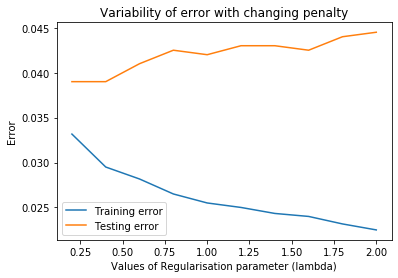

In [17]:
plt.plot(C, error_train)
plt.plot(C,error_test)
plt.xlabel('Values of Regularisation parameter (lambda)')
plt.ylabel('Error')
plt.legend(['Training error','Testing error'])
plt.title('Variability of error with changing penalty')

In [74]:
print('The best accuracy score came out to be:')
print((1 - min(error_test))*100)

The best accuracy score came out to be:
96.1


### *SVM*

In [97]:
def SVM_model_train(x_train, y_train, x_test, c = 1, g = 'scale', k = 'linear'):
    svclassifier = SVC(kernel= k, C = c, gamma = g)
    svclassifier.fit(x_train, y_train)
    y_pred_svm = svclassifier.predict(x_test)
    return y_pred_svm

In [98]:
print('The accuracy score of the SVM model:')
svm_pred = SVM_model_train(x_train, y_train, x_test)
print(accuracy_score(y_test, svm_pred) * 100)

The accuracy score of the SVM model:
95.55


In [19]:
C_svm = [0.1*i for i in range(1,11)]
error_svm_train = []
error_svm_test = []
for lamb in C_svm:
    y_pred_svm_test = SVM_model_train(x_train, y_train, x_test, lamb)
    y_pred_svm_train = SVM_model_train(x_train, y_train, x_train, lamb)
    err_svm_test = 1 - accuracy_score(y_test, y_pred_svm_test)
    err_svm_train = 1 - accuracy_score(y_train, y_pred_svm_train)
    error_svm_train.append(err_svm_train)
    error_svm_test.append(err_svm_test)

Text(0.5, 1.0, 'Variability of error with changing penalty')

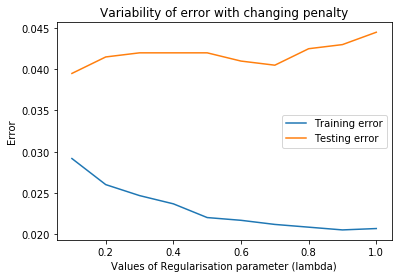

In [20]:
plt.plot(C_svm, error_svm_train)
plt.plot(C_svm, error_svm_test)
plt.xlabel('Values of Regularisation parameter (lambda)')
plt.ylabel('Error')
plt.legend(['Training error','Testing error'])
plt.title('Variability of error with changing penalty')

In [100]:
print('The best accuracy achieved with the value of C is:')
print((1 - min(error_svm_test)) * 100)

The best accuracy achieved with the value of C is:
96.05


### *K-Fold CV*

In [21]:

def k_fold_cv(k, df_x_train, df_y_train, model):
    error= []
    opt_C = []
    # Splitting the dataset into training and testing according to k-fold-cv
    for i in range(1,k+1):
        fold = int(len(df_x_train) / k);
        if (i == 1):
            x_train_k = pd.concat([df_x_train.iloc[0 : fold*(i-1)],df_x_train.iloc[fold*i :]], axis = 0)
            y_train_k = pd.concat([df_y_train.iloc[0 : fold*(i-1)],df_y_train.iloc[fold*i :]], axis = 0) 
            x_test_k = df_x_train.iloc[fold*(i-1) : fold*i]
            y_test_k = df_y_train.iloc[fold*(i-1) : fold*i]
        else:
            x_train_k = pd.concat([df_x_train.iloc[0 : fold*(i-1) - 1],df_x_train.iloc[fold*i :]], axis = 0) 
            y_train_k = pd.concat([df_y_train.iloc[0 : fold*(i-1) - 1],df_y_train.iloc[fold*i :]], axis = 0) 
            x_test_k = df_x_train.iloc[fold*(i-1) : fold*i - 1]
            y_test_k = df_y_train.iloc[fold*(i-1) : fold*i - 1]
        
        x_train_k = x_train_k.to_numpy()
        y_train_k = y_train_k.to_numpy()
        x_test_k = x_test_k.to_numpy()
        y_test_k = y_test_k.to_numpy()
        y_train_k = np.reshape(y_train_k, len(y_train_k))
        y_test_k = np.reshape(y_test_k, len(y_test_k))
        
        opt_err = 1
        opt_c = 0
        if model == 'svm':
            C_svm = [0.05*i for i in range(1,11)]
            for lamb0 in C_svm:
                ypred_svm = SVM_model_train(x_train_k, y_train_k, x_test_k, lamb0)
                err = 1 - accuracy_score(y_test_k, ypred_svm)
                if err < opt_err:
                    opt_err = err
                    opt_c = lamb0
            error.append(opt_err)
            opt_C.append(opt_c)
                    
        elif model == 'lr':
            C_lr = [0.1*i for i in range(1,11)]
            for lamb1 in C_lr:
                ypred_lr = LR_model_train(x_train_k, y_train_k, x_test_k, lamb1)
                err = 1 - accuracy_score(y_test_k, ypred_lr)
                if err < opt_err:
                    opt_err = err
                    opt_c = lamb1
            error.append(opt_err)
            opt_C.append(opt_c)
    return opt_C, error

In [22]:
clogr, er_logr = k_fold_cv(5, df_x_train, df_y_train, 'lr')
csvm, er_svm = k_fold_cv(5, df_x_train, df_y_train, 'svm')

C:\Users\divya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\divya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\divya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\divya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\divya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\divya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [67]:
er_svm

[0.060833333333333295,
 0.07923269391159304,
 0.0417014178482068,
 0.05504587155963303,
 0.05170975813177647]

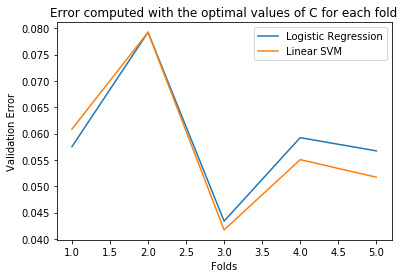

In [101]:
plt.plot([1,2,3,4,5], er_logr)
plt.plot([1,2,3,4,5], er_svm)
plt.title('Error computed with the optimal values of C for each fold')
plt.xlabel('Folds')
plt.ylabel('Validation Error')
plt.legend(['Logistic Regression','Linear SVM'])

Text(0, 0.5, 'Regularisation Parameter')

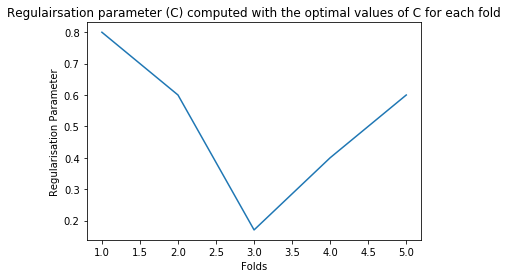

In [103]:
plt.plot([1,2,3,4,5], clogr)
# plt.plot([1,2,3,4,5], csvm)
plt.title('Regulairsation parameter (C) computed with the optimal values of C for each fold')
plt.xlabel('Folds')
plt.ylabel('Regularisation Parameter')
# plt.legend(['Logistic Regression','Linear SVM'])

In [23]:
ind_lr = er_logr.index(min(er_logr))
ind_svm = er_svm.index(min(er_svm))

In [94]:
c_logr = clogr[2]

In [95]:
y_predlr = LR_model_train(x_train, y_train, x_test, c_logr)
err_lr = accuracy_score(y_predlr, y_test)*100
print(err_lr)

96.15


In [25]:
y_predsvm = SVM_model_train(x_train, y_train, x_test, csvm[ind_svm])
err_svm = accuracy_score(y_predsvm, y_test)*100
print(err_svm)

96.0


### *Non Linear Svm*

In [27]:
def k_fold_cv_NL(k, df_x_train, df_y_train):
    error= []
    opt_C = []
    # Splitting the dataset into training and testing according to k-fold-cv
    for i in range(1,k+1):
        fold = int(len(df_x_train) / k);
        if (i == 1):
            x_train_k = pd.concat([df_x_train.iloc[0 : fold*(i-1)],df_x_train.iloc[fold*i :]], axis = 0)
            y_train_k = pd.concat([df_y_train.iloc[0 : fold*(i-1)],df_y_train.iloc[fold*i :]], axis = 0) 
            x_test_k = df_x_train.iloc[fold*(i-1) : fold*i]
            y_test_k = df_y_train.iloc[fold*(i-1) : fold*i]
        else:
            x_train_k = pd.concat([df_x_train.iloc[0 : fold*(i-1) - 1],df_x_train.iloc[fold*i :]], axis = 0) 
            y_train_k = pd.concat([df_y_train.iloc[0 : fold*(i-1) - 1],df_y_train.iloc[fold*i :]], axis = 0) 
            x_test_k = df_x_train.iloc[fold*(i-1) : fold*i - 1]
            y_test_k = df_y_train.iloc[fold*(i-1) : fold*i - 1]
        
        x_train_k = x_train_k.to_numpy()
        y_train_k = y_train_k.to_numpy()
        x_test_k = x_test_k.to_numpy()
        y_test_k = y_test_k.to_numpy()
        y_train_k = np.reshape(y_train_k, len(y_train_k))
        y_test_k = np.reshape(y_test_k, len(y_test_k))
        
        opt_err = 1
        opt_c = 0
        gamma = [0.0001, 0.001, 0.01, 0.1, 1]
        C_svm = [0.05*i for i in range(1,11)]
        for g in gamma:
            for lamb0 in C_svm:
                ypred_svm = SVM_model_train(x_train_k, y_train_k, x_test_k, lamb0, g, 'rbf')
                err = 1 - accuracy_score(y_test_k, ypred_svm)
                if err < opt_err:
                    opt_err = err
                    opt_c = lamb0
            error.append(opt_err)
            opt_C.append((g,opt_c))
                    
    return opt_C, error

In [28]:
c_svm_nl, er_svm_nl = k_fold_cv_NL(5, df_x_train, df_y_train)

In [49]:
ind1 = er_svm_nl[0:5].index(min(er_svm_nl[0:5]))
ind2 = er_svm_nl[5:10].index(min(er_svm_nl[5:10])) + 5
ind3 = er_svm_nl[10:15].index(min(er_svm_nl[10:15])) + 10
ind4 = er_svm_nl[15:20].index(min(er_svm_nl[15:20])) + 15
ind5 = er_svm_nl[20:25].index(min(er_svm_nl[20:25])) + 20
indices = [ind1, ind2, ind3, ind4, ind5]
err_ind = []
indices

[3, 8, 12, 17, 22]

In [50]:
for i in indices:
    pred = SVM_model_train(x_train, y_train, x_test, c_svm_nl[i][1], c_svm_nl[i][0], 'rbf')
    err_ind.append(1 - accuracy_score(y_test, pred))

[0.04500000000000004, 0.04500000000000004, 0.03600000000000003, 0.03600000000000003, 0.039000000000000035]


Text(0, 0.5, 'Error')

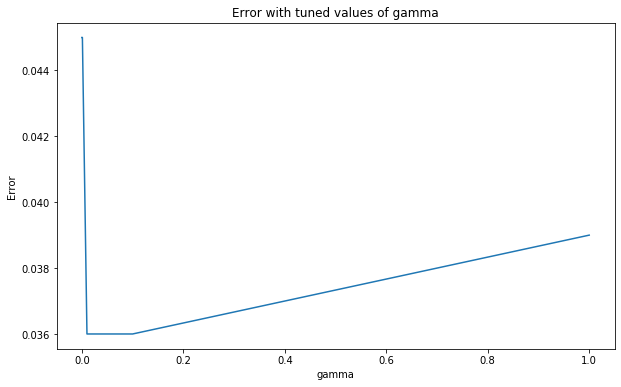

In [107]:
print(err_ind)
plt.figure(figsize = (10,6))
plt.plot([0.0001, 0.001, 0.01, 0.1, 1.0], err_ind)
plt.title('Error with tuned values of gamma')
plt.xlabel('gamma')
plt.ylabel('Error')

In [68]:
(1 - min(err_ind))*100

96.39999999999999